# Learning the ADNI Dataset

#### Reading the data:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'DejaVu Sans'})

data = pd.read_csv("DATA/ADNI_dataset.csv", low_memory=False) # Need the low_memory or dtypes warning
print(data.shape)
data.head(10)

(12218, 1050)


,PTID,rs4575098,rs6656401,rs2093760,rs4844610,rs4663105,rs6733839,rs10933431,rs35349669,rs6448453,...,H_MUSE_Volume_606,H_MUSE_Volume_607,H_MUSE_Volume_613,H_MUSE_Volume_614,H_MUSE_Volume_701,SPARE_AD,SPARE_BA,SPARE_AD[SVM-RBF],SPARE_BA[SVM-RBF],SITE
0,002_S_0295,0,0,0,0,1,1,1,0,0,...,308998.055294,270303.756004,314556.465973,273115.198314,1.255873e+06,-0.162794,71.831444,-0.112637,74.025016,ADNI1
1,002_S_0295,0,0,0,0,1,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADNI1
2,002_S_0295,0,0,0,0,1,1,1,0,0,...,310338.351075,271966.029720,315881.548717,273382.318280,1.261053e+06,-0.036576,70.201471,-0.027667,73.386685,ADNI1
3,002_S_0295,0,0,0,0,1,1,1,0,0,...,306704.833815,273390.951908,312616.974299,274713.867451,1.257529e+06,-0.163994,71.855445,-0.105581,75.642370,ADNI1
4,002_S_0295,0,0,0,0,1,1,1,0,0,...,302574.891883,266401.920718,305307.578179,269729.758345,1.234666e+06,-0.095210,74.188502,0.032380,77.964696,ADNI1
5,002_S_0295,0,0,0,0,1,1,1,0,0,...,299716.988865,267971.638507,305161.060038,269703.597005,1.235106e+06,-0.008448,77.195276,0.073154,79.471024,ADNI1
6,002_S_0295,0,0,0,0,1,1,1,0,0,...,303069.100546,268810.976578,306473.160994,269699.364479,1.241852e+06,-0.030762,74.397993,0.091878,78.920035,ADNI1
7,002_S_0295,0,0,0,0,1,1,1,0,0,...,305300.711909,260158.540612,306981.182512,261082.843400,1.228903e+06,0.058756,71.969135,0.044012,79.674923,ADNI2/3
8,002_S_0295,0,0,0,0,1,1,1,0,0,...,301997.885211,257870.468253,302515.235204,258461.407701,1.217992e+06,0.188253,73.857762,0.248106,80.877542,ADNI2/3
9,002_S_0413,1,0,0,0,0,0,0,1,0,...,309645.335452,255938.661550,316149.313527,257568.751438,1.212597e+06,-1.888502,71.674021,-1.313643,75.828958,ADNI1


#### Some columns that interest us:

In [2]:
columns_of_interest = ['PTID',
                       'Date',
                       'Age', 
                       'Sex',
                       'APOE4_Alleles',
                       'APOE_Genotype', 
                       'Family_History_Dementia', 
                       'Diabetes', 
                       'Hypertension',
                       'Alcoholic',
                       'Cholesterol',
                       'Diastole', 
                       'Systole', 
                       'Smoking',
                       'BMI',
                       'Diagnosis_nearest_2.0',
                       'DLICV_baseline']
c = list(data.columns)
MRI_columns = c[c.index("MUSE_Volume_4"):c.index("MUSE_Volume_207")+1]

columns_of_interest += MRI_columns

data_of_interest = data[columns_of_interest]
data_of_interest.head(10)

,PTID,Date,Age,Sex,APOE4_Alleles,APOE_Genotype,Family_History_Dementia,Diabetes,Hypertension,Alcoholic,...,MUSE_Volume_198,MUSE_Volume_199,MUSE_Volume_200,MUSE_Volume_201,MUSE_Volume_202,MUSE_Volume_203,MUSE_Volume_204,MUSE_Volume_205,MUSE_Volume_206,MUSE_Volume_207
0,002_S_0295,2006-04-18,84.742466,M,1.0,E3/E4,0.0,Diabetes negative/absent,Hypertension negative/absent,0.0,...,9220.073956,7986.090139,4336.873039,4313.669925,8816.128827,7512.535666,2559.725405,2955.233039,994.569863,1110.585435
1,002_S_0295,2006-04-28,84.769844,M,1.0,E3/E4,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,002_S_0295,2006-11-02,85.284560,M,1.0,E3/E4,0.0,NaN,NaN,NaN,...,9439.424318,8169.584443,4308.385289,4394.869400,8842.473015,7662.281304,2637.765388,3000.576780,933.395589,1124.293444
3,002_S_0295,2007-05-25,85.843082,M,1.0,E3/E4,0.0,NaN,NaN,NaN,...,9358.242188,8085.234375,4221.914062,4222.968750,8648.437500,7305.820312,2538.632812,3036.445312,945.000000,1072.617188
4,002_S_0295,2008-07-23,87.006668,M,1.0,E3/E4,0.0,NaN,NaN,NaN,...,9009.136552,7861.637071,3963.513833,4217.693406,8488.121162,7543.121590,2508.045741,2828.670596,932.343328,1062.069832
5,002_S_0295,2009-05-22,87.836237,M,1.0,E3/E4,0.0,NaN,NaN,NaN,...,9069.248587,7847.921704,4166.011387,4079.527100,8385.811782,7361.711261,2454.255316,2904.606420,990.350555,1061.014546
6,002_S_0295,2010-05-13,88.810912,M,1.0,E3/E4,0.0,NaN,NaN,NaN,...,9084.023438,8016.679688,4048.945312,4294.687500,8287.734375,7016.835938,2500.664062,2785.429688,882.773438,1027.265625
7,002_S_0295,2011-06-02,89.864985,M,1.0,E3/E4,0.0,NaN,NaN,0.0,...,9424.776031,9323.976288,4261.189163,4246.789200,7961.979752,7305.581421,2618.393341,3321.591553,1052.397324,1149.597076
8,002_S_0295,2012-05-10,90.804067,M,1.0,E3/E4,0.0,NaN,NaN,NaN,...,9487.175873,9322.776291,3987.589859,4169.989395,7621.180618,7047.582077,2619.593338,3297.591614,998.397461,1142.397095
9,002_S_0413,2006-05-02,76.283562,F,0.0,E3/E3,0.0,Diabetes negative/absent,Hypertension negative/absent,0.0,...,9925.633772,11152.231591,7421.813288,6059.161196,6676.151501,7780.405944,2469.015903,2239.094729,1097.926337,744.607103


#### Find the unique participants:

In [3]:
data_of_interest.dropna(subset=['MUSE_Volume_4', 'DLICV_baseline','Diagnosis_nearest_2.0'], inplace=True)
data_of_interest.sort_values(by=['PTID', 'Age'])
unique = data_of_interest.drop_duplicates(subset=['PTID'], keep='first')

print(unique.shape)
unique.head(10)

(1567, 162)


,PTID,Date,Age,Sex,APOE4_Alleles,APOE_Genotype,Family_History_Dementia,Diabetes,Hypertension,Alcoholic,...,MUSE_Volume_198,MUSE_Volume_199,MUSE_Volume_200,MUSE_Volume_201,MUSE_Volume_202,MUSE_Volume_203,MUSE_Volume_204,MUSE_Volume_205,MUSE_Volume_206,MUSE_Volume_207
0,002_S_0295,2006-04-18,84.742466,M,1.0,E3/E4,0.0,Diabetes negative/absent,Hypertension negative/absent,0.0,...,9220.073956,7986.090139,4336.873039,4313.669925,8816.128827,7512.535666,2559.725405,2955.233039,994.569863,1110.585435
9,002_S_0413,2006-05-02,76.283562,F,0.0,E3/E3,0.0,Diabetes negative/absent,Hypertension negative/absent,0.0,...,9925.633772,11152.231591,7421.813288,6059.161196,6676.151501,7780.405944,2469.015903,2239.094729,1097.926337,744.607103
24,002_S_0559,2006-05-23,79.223288,M,1.0,E3/E4,0.0,Diabetes negative/absent,Hypertension negative/absent,0.0,...,7430.270078,6746.832887,7983.980765,7081.168674,10475.151514,11083.705926,3069.139237,2872.967451,1051.522962,1274.061924
31,002_S_0619,2006-06-01,77.447945,M,2.0,E4/E4,0.0,Diabetes negative/absent,Hypertension negative/absent,1.0,...,10113.413298,11186.032061,7032.666584,6352.392146,7272.080998,7162.393337,2489.066157,2506.995871,1155.939198,1574.650751
36,002_S_0685,2006-07-06,89.561644,F,0.0,E3/E3,1.0,Diabetes negative/absent,Hypertension positive/present,0.0,...,7989.249685,8070.460540,4039.449016,3574.332301,6934.563258,6778.469667,2066.130711,2608.239534,434.530808,710.858652
45,002_S_0729,2006-07-17,65.056164,F,1.0,E3/E4,1.0,Diabetes negative/absent,Hypertension negative/absent,0.0,...,7825.792749,7452.432825,5885.164897,6838.603798,6198.407545,5983.250979,2492.230224,2634.613246,907.032583,965.040480
64,002_S_0816,2006-08-30,70.767123,M,2.0,E4/E4,0.0,Diabetes negative/absent,Hypertension positive/present,1.0,...,8353.778660,10653.574296,6102.256452,3913.861035,9309.344985,8022.053563,2522.596075,2245.333307,932.048501,1372.698257
69,002_S_0938,2006-10-05,82.167123,F,0.0,E3/E3,1.0,Diabetes negative/absent,Hypertension negative/absent,0.0,...,7114.918658,8076.793223,5972.692612,6067.614444,5100.466444,6486.325192,2143.124031,3550.076520,816.327756,787.851206
74,002_S_0954,2006-10-10,69.198630,F,1.0,E3/E4,1.0,Diabetes negative/absent,Hypertension positive/present,0.0,...,4882.155611,6550.673688,4456.061235,5224.929552,7428.174977,6380.868751,2790.707226,2537.581854,679.219748,936.563876
81,002_S_0955,2006-10-11,78.161644,F,1.0,E3/E4,0.0,NaN,Hypertension negative/absent,0.0,...,6368.200246,8345.738414,5395.778811,5020.310230,7007.340582,6063.395696,2727.420642,3095.506413,684.491878,1337.343145


#### Visualizations:

M    885
F    682
Name: Sex, dtype: int64


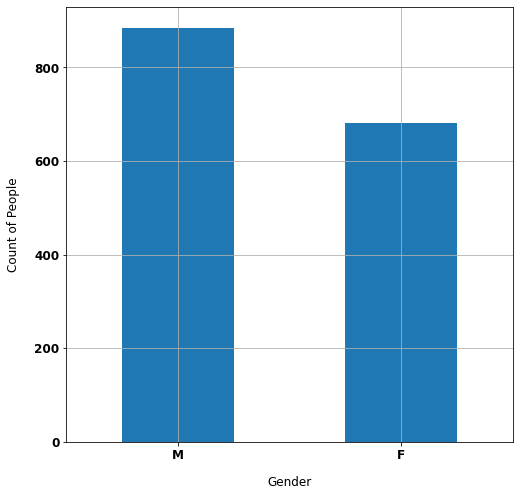

In [4]:
print(unique['Sex'].value_counts())
unique['Sex'].value_counts().plot(kind='bar', figsize=(8,8), rot=0, grid=True);
plt.xlabel("Gender", labelpad=14);
plt.ylabel("Count of People", labelpad=14);

Sex
F    72.916567
M    74.505456
Name: Age, dtype: float64


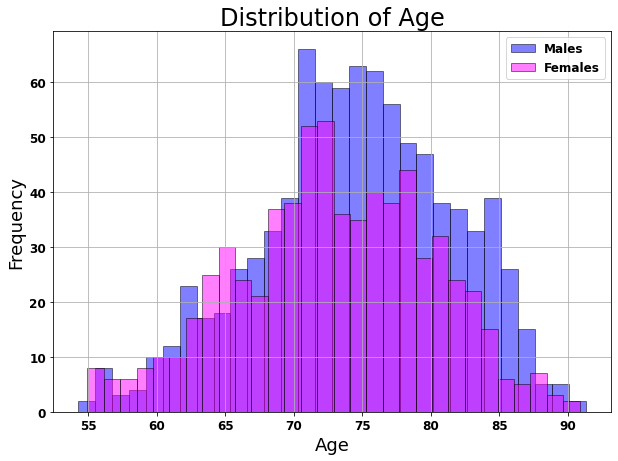

In [5]:
print(unique.groupby('Sex').Age.mean())
unique[unique['Sex'] == 'M'].Age.plot(kind='hist', bins=30, color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7), grid=True)
unique[unique['Sex'] == 'F'].Age.plot(kind='hist', bins=30,color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7), grid=True)
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Age', size=24)
plt.xlabel('Age', size=18)
plt.ylabel('Frequency', size=18);

E3/E3    713
E3/E4    553
E4/E4    157
E2/E3    113
E2/E4     30
E2/E2      1
Name: APOE_Genotype, dtype: int64
0.0    827
1.0    583
2.0    157
Name: APOE4_Alleles, dtype: int64


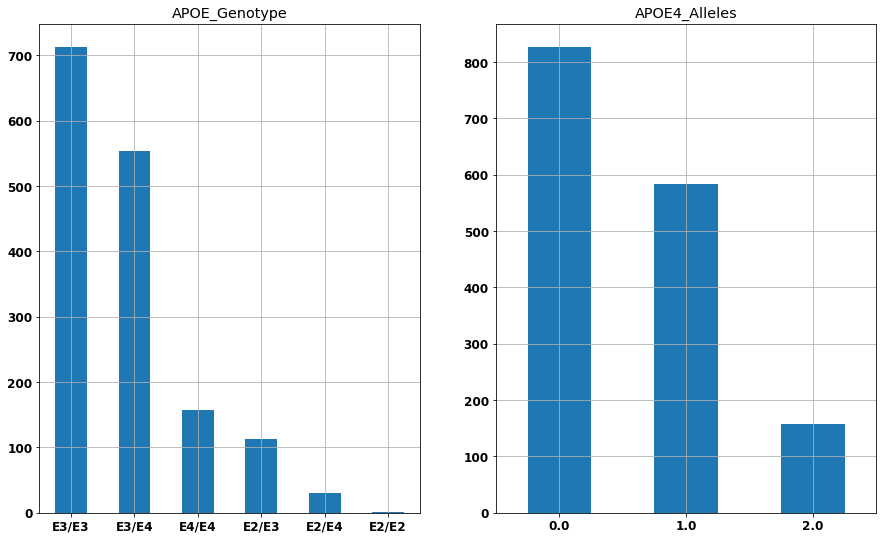

In [6]:
print(unique['APOE_Genotype'].value_counts())
print(unique['APOE4_Alleles'].value_counts())
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,9));
unique.APOE_Genotype.value_counts().plot(kind='bar', ax = axes[0], subplots=True, rot=0, grid=True);
unique.APOE4_Alleles.value_counts().plot(kind='bar', ax = axes[1], subplots=True, rot=0, grid=True);

Diabetes negative/absent     608
Diabetes positive/present     83
Name: Diabetes, dtype: int64

Hypertension negative/absent     827
Hypertension positive/present    730
Name: Hypertension, dtype: int64

0.0    715
1.0     32
Name: Alcoholic, dtype: int64

Never      450
Current    295
Former       2
Name: Smoking, dtype: int64

1.0    791
0.0    726
Name: Family_History_Dementia, dtype: int64

MCI         797
CN          461
Dementia    309
Name: Diagnosis_nearest_2.0, dtype: int64



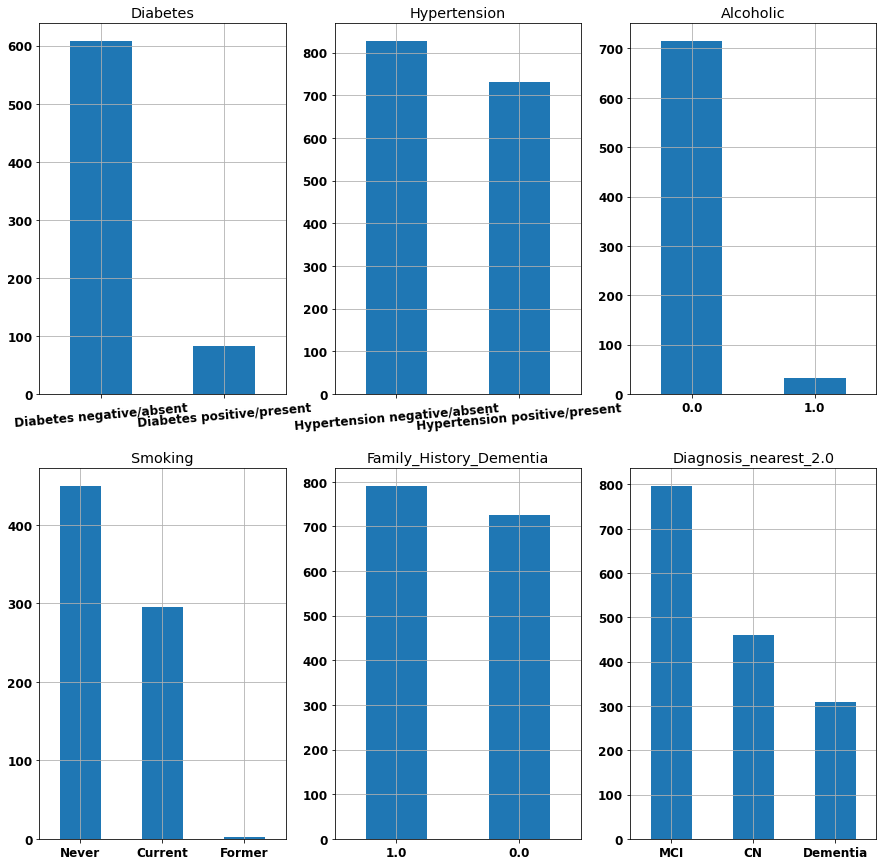

In [7]:
print(unique['Diabetes'].value_counts()); print()
print(unique['Hypertension'].value_counts()); print()
print(unique['Alcoholic'].value_counts()); print()
print(unique['Smoking'].value_counts()); print()
print(unique['Family_History_Dementia'].value_counts()); print()
print(unique['Diagnosis_nearest_2.0'].value_counts()); print()


fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(15,15));
unique.Diabetes.value_counts().plot(kind='bar', ax = axes[0,0], subplots=True, rot=5, grid=True);
unique.Hypertension.value_counts().plot(kind='bar', ax = axes[0,1], subplots=True, rot=5, grid=True);
unique.Alcoholic.value_counts().plot(kind='bar', ax = axes[0,2], subplots=True, rot=0, grid=True);
unique.Smoking.value_counts().plot(kind='bar', ax = axes[1,0], subplots=True, rot=0, grid=True);
unique.Family_History_Dementia.value_counts().plot(kind='bar', ax = axes[1,1], subplots=True, rot=0, grid=True);
unique['Diagnosis_nearest_2.0'].value_counts().plot(kind='bar', ax = axes[1,2], subplots=True, rot=0, grid=True);

MCI         797
CN          461
Dementia    309
Name: Diagnosis_nearest_2.0, dtype: int64


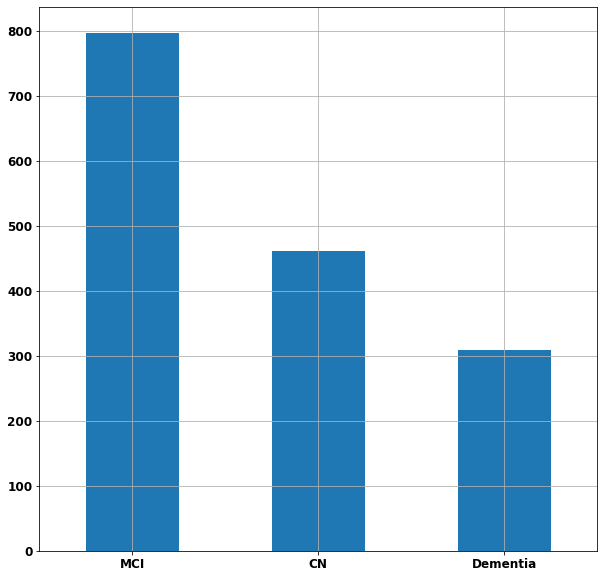

In [8]:
print(unique['Diagnosis_nearest_2.0'].value_counts());
unique['Diagnosis_nearest_2.0'].value_counts().plot(kind='bar', rot=0, figsize = (10,10), grid=True);

### Selecting a subset that can be used reliably:

In [9]:
age_mask =      (unique['Age']>=65)   &   (unique['Age']<=85)
print(unique[age_mask].shape)
unique[age_mask].head()

(1302, 162)


,PTID,Date,Age,Sex,APOE4_Alleles,APOE_Genotype,Family_History_Dementia,Diabetes,Hypertension,Alcoholic,...,MUSE_Volume_198,MUSE_Volume_199,MUSE_Volume_200,MUSE_Volume_201,MUSE_Volume_202,MUSE_Volume_203,MUSE_Volume_204,MUSE_Volume_205,MUSE_Volume_206,MUSE_Volume_207
0,002_S_0295,2006-04-18,84.742466,M,1.0,E3/E4,0.0,Diabetes negative/absent,Hypertension negative/absent,0.0,...,9220.073956,7986.090139,4336.873039,4313.669925,8816.128827,7512.535666,2559.725405,2955.233039,994.569863,1110.585435
9,002_S_0413,2006-05-02,76.283562,F,0.0,E3/E3,0.0,Diabetes negative/absent,Hypertension negative/absent,0.0,...,9925.633772,11152.231591,7421.813288,6059.161196,6676.151501,7780.405944,2469.015903,2239.094729,1097.926337,744.607103
24,002_S_0559,2006-05-23,79.223288,M,1.0,E3/E4,0.0,Diabetes negative/absent,Hypertension negative/absent,0.0,...,7430.270078,6746.832887,7983.980765,7081.168674,10475.151514,11083.705926,3069.139237,2872.967451,1051.522962,1274.061924
31,002_S_0619,2006-06-01,77.447945,M,2.0,E4/E4,0.0,Diabetes negative/absent,Hypertension negative/absent,1.0,...,10113.413298,11186.032061,7032.666584,6352.392146,7272.080998,7162.393337,2489.066157,2506.995871,1155.939198,1574.650751
45,002_S_0729,2006-07-17,65.056164,F,1.0,E3/E4,1.0,Diabetes negative/absent,Hypertension negative/absent,0.0,...,7825.792749,7452.432825,5885.164897,6838.603798,6198.407545,5983.250979,2492.230224,2634.613246,907.032583,965.040480


In [12]:
print(unique[age_mask]['Sex'].value_counts())
print(unique[age_mask].groupby('Sex').Age.mean())
print(unique[age_mask]['Diagnosis_nearest_2.0'].value_counts());

M    741
F    561
Name: Sex, dtype: int64
Sex
F    74.363397
M    75.207885
Name: Age, dtype: float64
MCI         626
CN          433
Dementia    243
Name: Diagnosis_nearest_2.0, dtype: int64


### Check to see if a certain ROI progresses linearly with age for a certain DLICV range, for a certain sex.

In [21]:
def Plotter(sex, age_range, DLICV_range, dataset, ROI_name):
    min_age, max_age = age_range[0], age_range[1]
    DLICV_min, DLICV_max = DLICV_range[0], DLICV_range[1]
    
    mask = (dataset['Age']>=min_age) & (dataset['Age']<=max_age) & (dataset['Sex']== sex)
    s = 'Males' if sex == 'M'  else 'Females'
    
    print("Min DLICV for ",s," within age range: " , int(dataset[mask].DLICV_baseline.min()))
    print("Max DLICV for ",s," within age range: " , int(dataset[mask].DLICV_baseline.max()))

    mask = (dataset['Age']>=min_age) & (dataset['Age']<=max_age) & (dataset['Sex']== sex) & (dataset['DLICV_baseline']>=DLICV_min) & (dataset['DLICV_baseline']<=DLICV_max)


    # Selecting the ROI for the hippocampus:
    X = dataset['Age']
    Y = dataset[ROI_name]

    plt.scatter(X[mask], Y[mask])
    plt.ylim((0,Y[mask].max()*1.5))
    plt.grid()
    
    
    plt.title(ROI_name+" for "+ s+ ", DLICV = ["+ str(round(DLICV_min,6)/10**6)+ ", "+ str(round(DLICV_max,6)/10**6)+"]*10^6")
    plt.ylabel("Volume")
    plt.xlabel("Age")
    plt.show()
    
    return

Min DLICV for  Males  within age range:  1133047
Max DLICV for  Males  within age range:  1859348


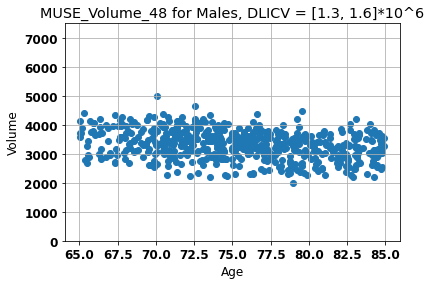

Min DLICV for  Females  within age range:  1057342
Max DLICV for  Females  within age range:  1705957


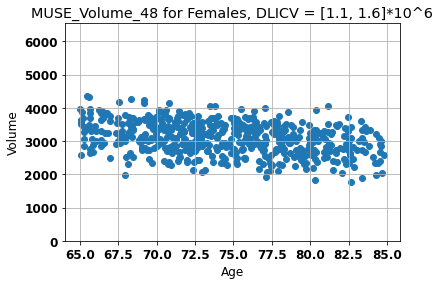

In [22]:
Plotter('M', (65,85), (1300000,1600000), unique, 'MUSE_Volume_48')
Plotter('F', (65,85), (1100000,1600000), unique, 'MUSE_Volume_48')

Min DLICV for  Males  within age range:  1133047
Max DLICV for  Males  within age range:  1859348


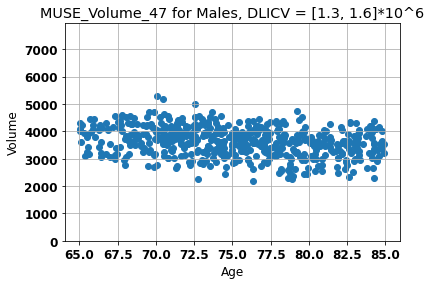

Min DLICV for  Females  within age range:  1057342
Max DLICV for  Females  within age range:  1705957


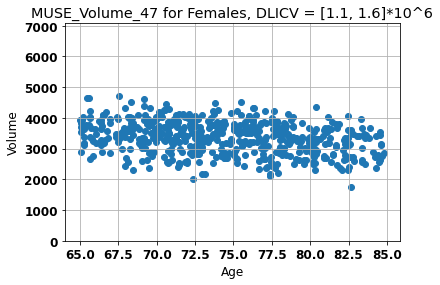

In [23]:
Plotter('M', (65,85), (1300000,1600000), unique, 'MUSE_Volume_47')
Plotter('F', (65,85), (1100000,1600000), unique, 'MUSE_Volume_47')

Min DLICV for  Males  within age range:  1133047
Max DLICV for  Males  within age range:  1859348


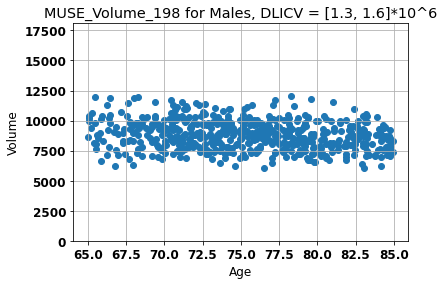

Min DLICV for  Females  within age range:  1057342
Max DLICV for  Females  within age range:  1705957


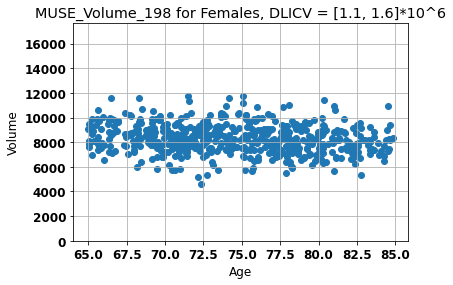

In [24]:
Plotter('M', (65,85), (1300000,1600000), unique, 'MUSE_Volume_198')
Plotter('F', (65,85), (1100000,1600000), unique, 'MUSE_Volume_198')